<a href="https://colab.research.google.com/github/Subedi1018/Data_science_thesis/blob/master_b/dessertation_Sailesh_main1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Project Dessertation: Sign Language Reconition system using Machine Learning

In [ ]:
# Import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

LOADING THE DATASET

In [ ]:
# Importing the datasets
train_df = pd.read_csv('drive/MyDrive/sign_mnist_train.csv')
test_df = pd.read_csv('drive/MyDrive/sign_mnist_test.csv')

OVERVIEW OF DATASET

In [ ]:
#for train
print(train_df.shape)
train_df.head()

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
#for test
print(test_df.shape)
test_df.head()

(7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


IDA and EDA

In [ ]:
#Check for missing values
train_df.isnull().values.any(), test_df.isnull().values.any()

(False, False)

In [ ]:
#Check for duplicates - train_df
train_df.duplicated().sum()

0

In [ ]:
#Check for duplicates - test df
test_df.duplicated().sum()

0

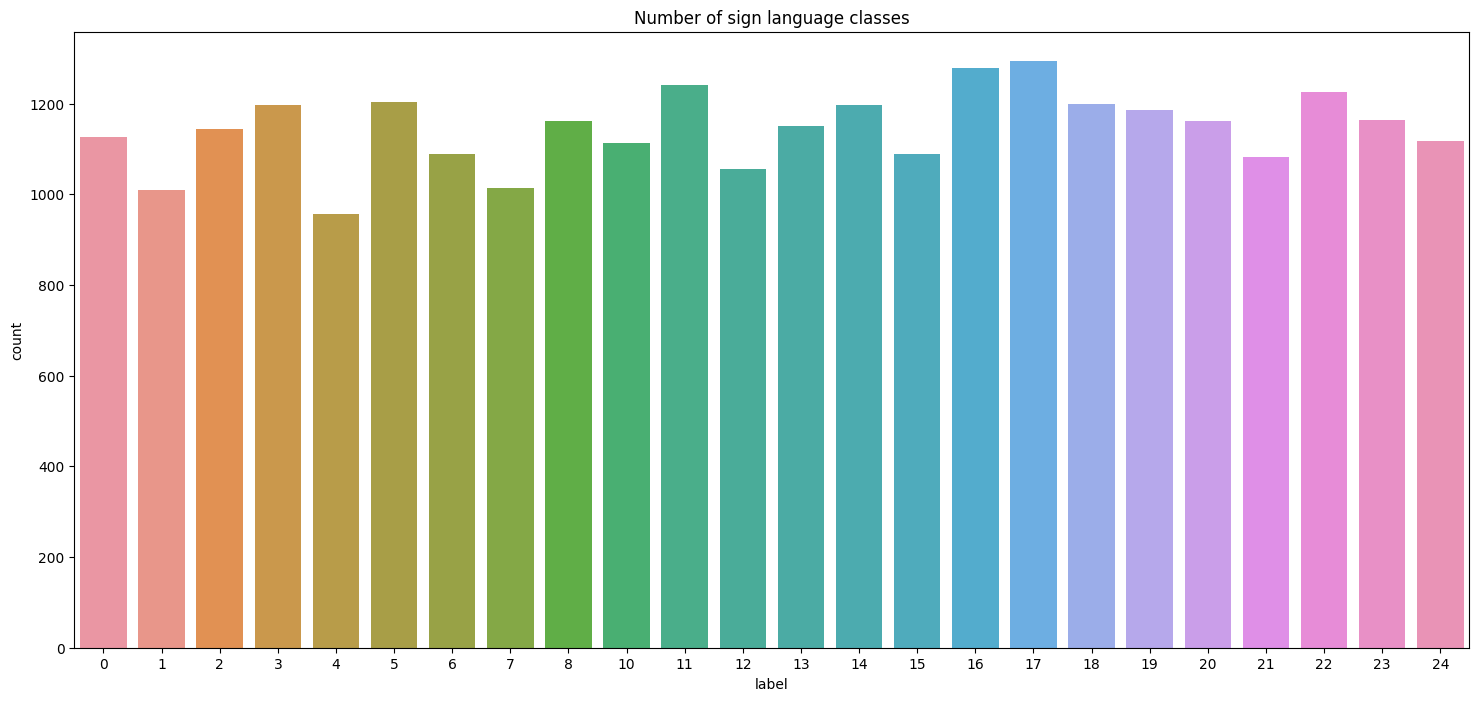

In [ ]:
# Check to see if the dataset is balanced or not
plt.figure(figsize = (18,8))
sns.countplot(data = train_df, x = 'label')
plt.title('Number of sign language classes')
plt.show()

- Dataset is balanced, However, 9(j) and 25(z) are not include since they need dynamic hand gestures to represent

In [ ]:
train_df['label'].value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

In [ ]:
train_df['label'].unique()

array([ 3,  6,  2, 13, 16,  8, 22, 18, 10, 20, 17, 19, 21, 23, 24,  1, 12,
       11, 15,  4,  0,  5,  7, 14])

In [ ]:
# Splitting features and targets
# -> features

X_train = train_df.drop(labels = ['label'], axis = 1)
X_test = test_df.drop(labels = ['label'], axis = 1)

# -> targets
Y_train = train_df['label']
Y_test = test_df['label']

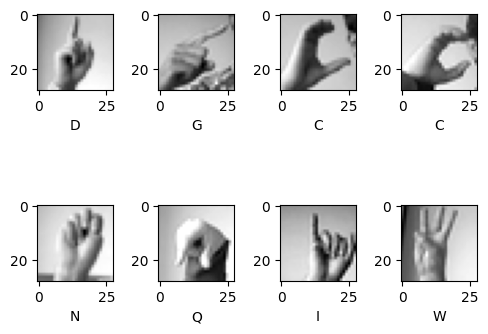

In [ ]:
# Visualizing some samples
f, ax = plt.subplots(2,4)
f.set_size_inches(5,5)

k = 0
for i in range(2):
  for j in range(4):
    img = X_train.iloc[k].to_numpy()
    img = img.reshape((28,28))
    ax[i,j].set_xlabel(chr(Y_train[k] + 65))
    ax[i,j].imshow(img,cmap="gray")
    k+=1
  plt.tight_layout()

DATA PREPROCESSING
 - Normalization:
 - Reshaping:
 - label encoding:

In [ ]:
# Normalization -> CNN works faster after normalizing
  # Scaling pixel values between 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

#Checking if the data are normalized
X_train.head(2)

X_train shape:  (27455, 784)
X_test shape:  (7172, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.419608,0.462745,0.498039,0.525490,0.545098,0.560784,0.572549,0.588235,0.600000,0.611765,...,0.811765,0.811765,0.811765,0.811765,0.807843,0.807843,0.807843,0.800000,0.796078,0.792157
1,0.607843,0.615686,0.611765,0.611765,0.611765,0.615686,0.611765,0.619608,0.619608,0.615686,...,0.270588,0.584314,0.501961,0.341176,0.368627,0.639216,0.686275,0.403922,0.529412,0.584314


In [ ]:
# Reshaping
  # We shape all the data to 28x28x1 3D matrices.
    # .reshape function takes 4 parameters (-1, size, size, channel) -> channel 1 = grayscale and 3 = RGB
X_train=X_train.values.reshape(-1,28,28,1)
X_test=X_test.values.reshape(-1,28,28,1)

print("x_train shape: ",X_train.shape)
print("test shape: ",X_test.shape)


x_train shape:  (27455, 28, 28, 1)
test shape:  (7172, 28, 28, 1)


In [ ]:
# Label Encoding
  # Encode labels to one hot vectors
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
Y_train = label_binrizer.fit_transform(Y_train)

SPLITTING TRAIN DATASET

In [ ]:
#Train Test Split: 80 ~ 20

from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 42)

In [ ]:
print("x_train shape",X_train.shape)
print("x_val shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_val shape",Y_val.shape)

x_train shape (21964, 28, 28, 1)
x_val shape (5491, 28, 28, 1)
y_train shape (21964, 24)
y_val shape (5491, 24)


# BUILDING A MODEL - CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools #

from keras.utils import to_categorical
from keras.models import Sequential # For model development
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D # For CNN layers
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator # For data augmentation
from keras.callbacks import ReduceLROnPlateau

In [ ]:
model=Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), padding="Same",
                activation="relu", input_shape=(28,28,1))) # # We have 8 filters. (5x5)
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#

model.add(Conv2D(filters=32, kernel_size=(3,3), padding="Same",
                activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="Same",
                activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connetcted
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(24,activation="softmax")) # this 25 means 25 neurons on output which actually shows 24 classes for classification

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 14, 14, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 7, 7, 32)         

Understanding model summary:

In [ ]:
# Defining the optimizer
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999) # beta_1 and beta_2 affects the change of learning rate


In [ ]:
# Compiling the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

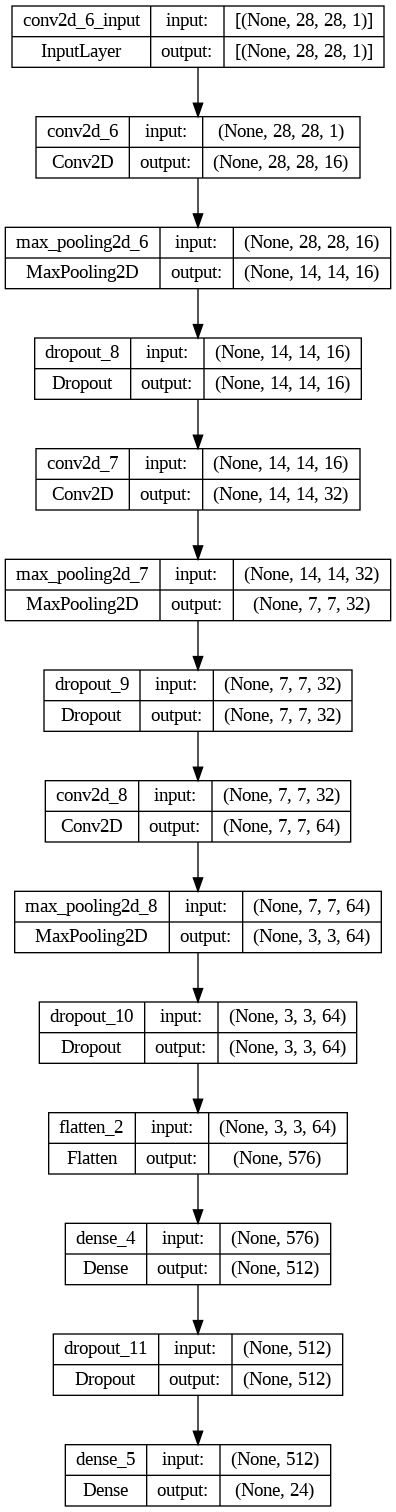

In [ ]:
# Further visualizing the model
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [ ]:
# Defining epochs and batch_size
epochs = 100
batch_size = 200


DATA AUGMENTATION
  - for dataset diversification and prevent overfitting
  -  This allows the model to look for more patterns and generalize better.

In [ ]:
datagen=ImageDataGenerator(rotation_range=40, # Random rotation angle of images.
                          width_shift_range=0.2, # Horizontal and vertical scroll ratio of images
                          height_shift_range=0.2,
                          shear_range=0.2, # Sprain process
                          zoom_range=0.2, # rapprochement process
                          horizontal_flip=True, #  Rotate image vertically.
                          fill_mode='nearest') # scroll, rotate, etc. determines how to fill in the excess image points that appear after the process.

datagen.fit(X_train)

In [ ]:
# Training the model
history=model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size), epochs=epochs,
                           validation_data=(X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/100
109/109 [==============================] - 31s 272ms/step - loss: 3.1729 - accuracy: 0.0506 - val_loss: 3.1476 - val_accuracy: 0.1074
Epoch 2/100
109/109 [==============================] - 27s 250ms/step - loss: 3.0114 - accuracy: 0.0983 - val_loss: 2.7692 - val_accuracy: 0.2231
Epoch 3/100
109/109 [==============================] - 28s 257ms/step - loss: 2.7417 - accuracy: 0.1578 - val_loss: 2.3334 - val_accuracy: 0.2994
Epoch 4/100
109/109 [==============================] - 30s 275ms/step - loss: 2.4889 - accuracy: 0.2165 - val_loss: 2.0696 - val_accuracy: 0.3458
Epoch 5/100
109/109 [==============================] - 31s 279ms/step - loss: 2.2798 - accuracy: 0.2713 - val_loss: 1.6913 - val_accuracy: 0.4453
Epoch 6/100
109/109 [==============================] - 28s 257ms/step - loss: 2.0880 - accuracy: 0.3307 - val_loss: 1.7244 - val_accuracy: 0.4181
Epoch 7/100
109/109 [==============================] - 30s 280ms/step - loss: 1.9209 - accuracy: 0.3777 - val_loss: 1.2946 -

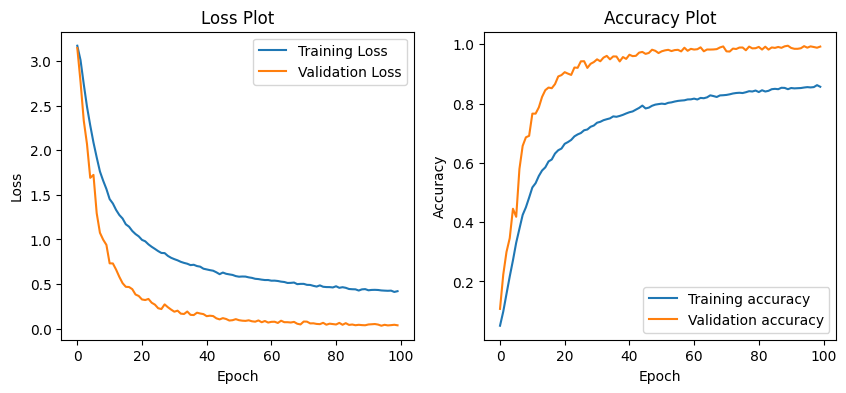

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(10,4))
ax[0].plot(history.history["loss"],label="Training Loss")
ax[0].plot(history.history["val_loss"],label="Validation Loss")
ax[0].set_title("Loss Plot")
ax[0].set_ylabel("Loss")
ax[0].set_xlabel("Epoch")
ax[0].legend()

ax[1].plot(history.history["accuracy"],label="Training accuracy")
ax[1].plot(history.history["val_accuracy"],label="Validation accuracy")
ax[1].set_title("Accuracy Plot")
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].legend()

plt.show()

Here, since the loss and truth are similar and move together, we can say that there is no overfitting problem

172/172 [==============================] - 2s 10ms/step


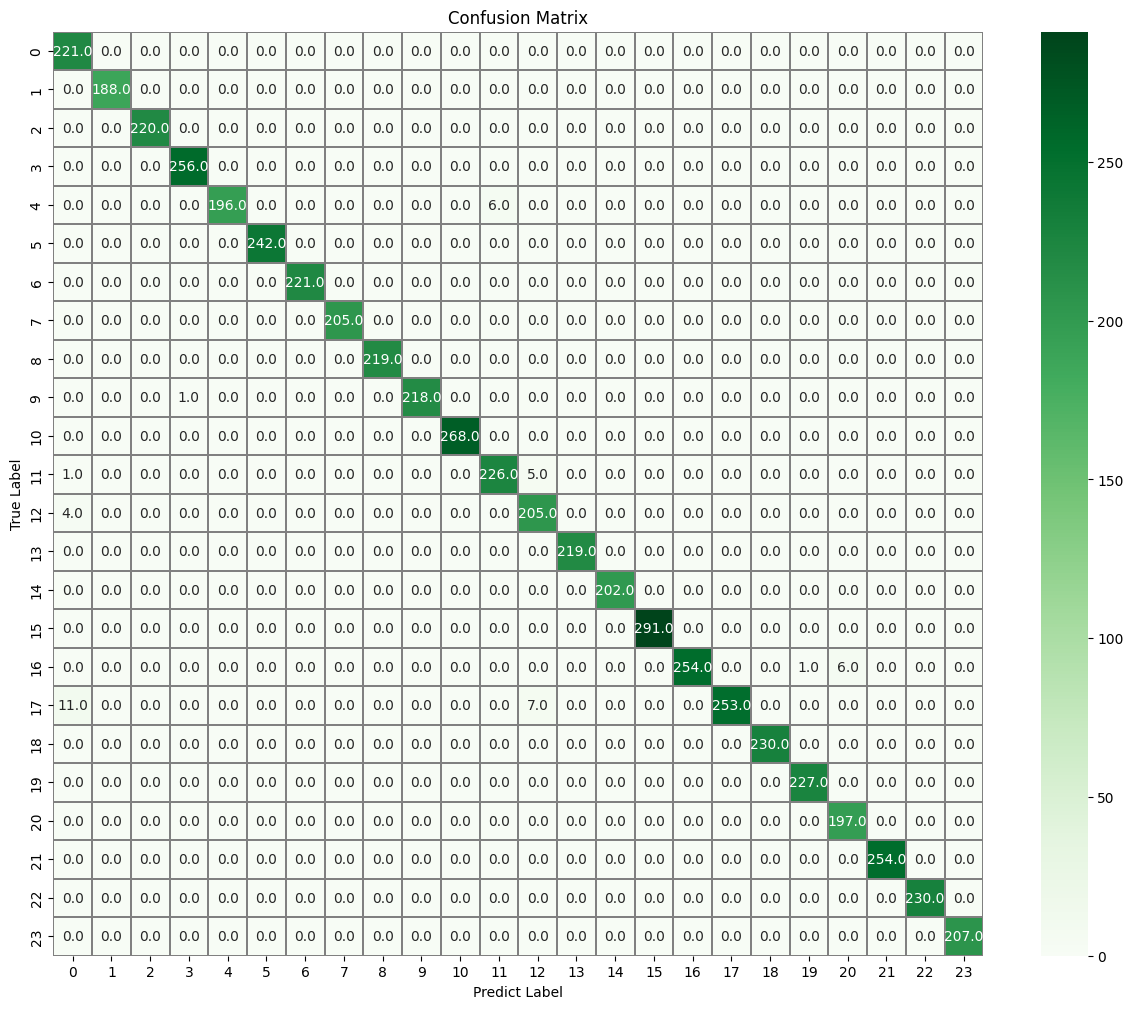

In [ ]:
# confusion matrix

# Predict the values from validation dataset
Y_pred=model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes=np.argmax(Y_pred, axis=1)
# Convert validation observation to one hot vectors
Y_true=np.argmax(Y_val, axis=1)
# Compute the confusion matrix
confusion_mtx=confusion_matrix(Y_true,Y_pred_classes)
# plot confusion matrix
f,ax=plt.subplots(figsize=(15,12))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt=".1f", ax=ax)
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

225/225 [==============================] - 2s 10ms/step


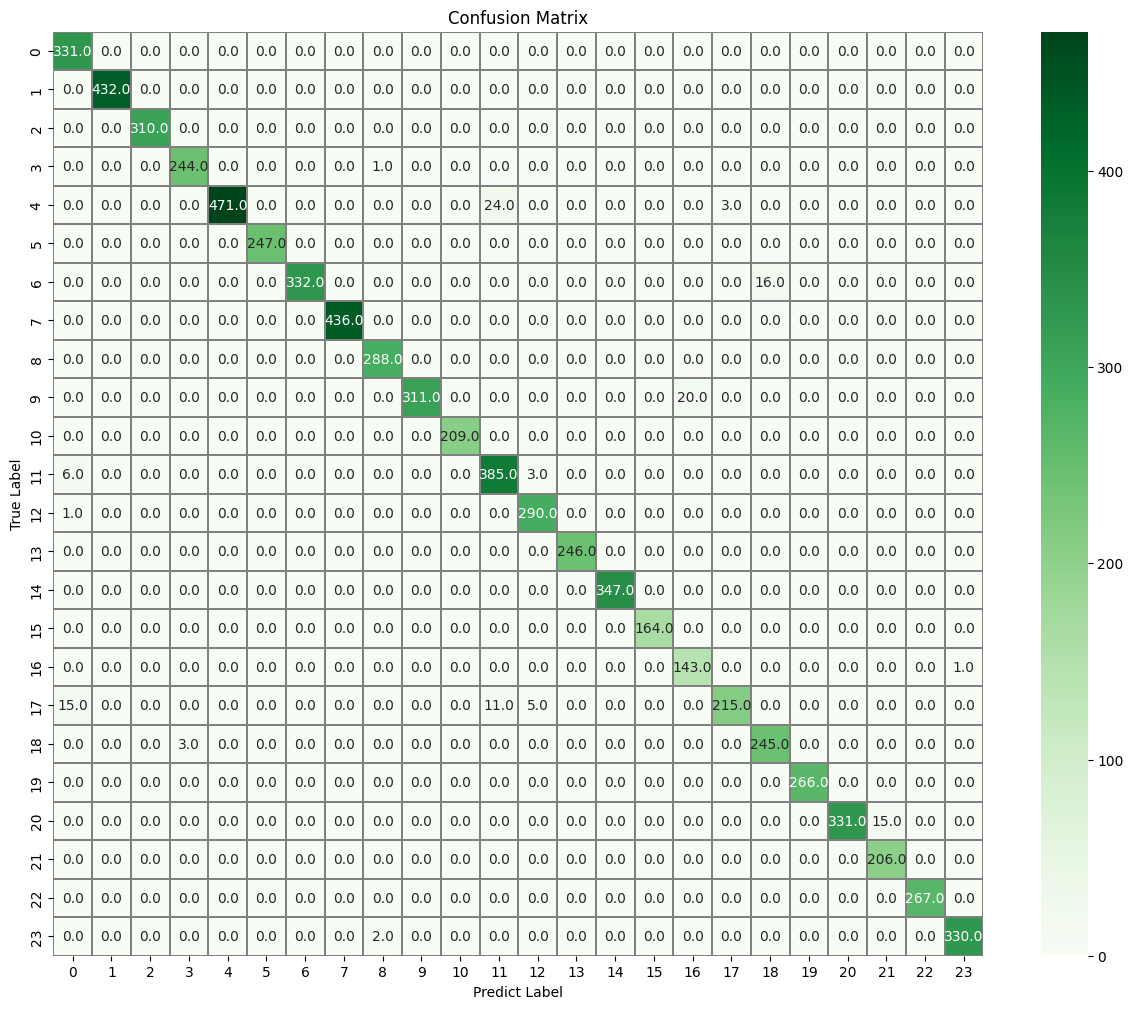

In [ ]:
# For test data set:
Y_test = label_binrizer.fit_transform(Y_test)

Y_pred=model.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes=np.argmax(Y_pred, axis=1)
# Convert validation observation to one hot vectors
Y_true=np.argmax(Y_test, axis=1)
# Compute the confusion matrix
confusion_mtx=confusion_matrix(Y_true,Y_pred_classes)
# plot confusion matrix
f,ax=plt.subplots(figsize=(15,12))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt=".1f", ax=ax)
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

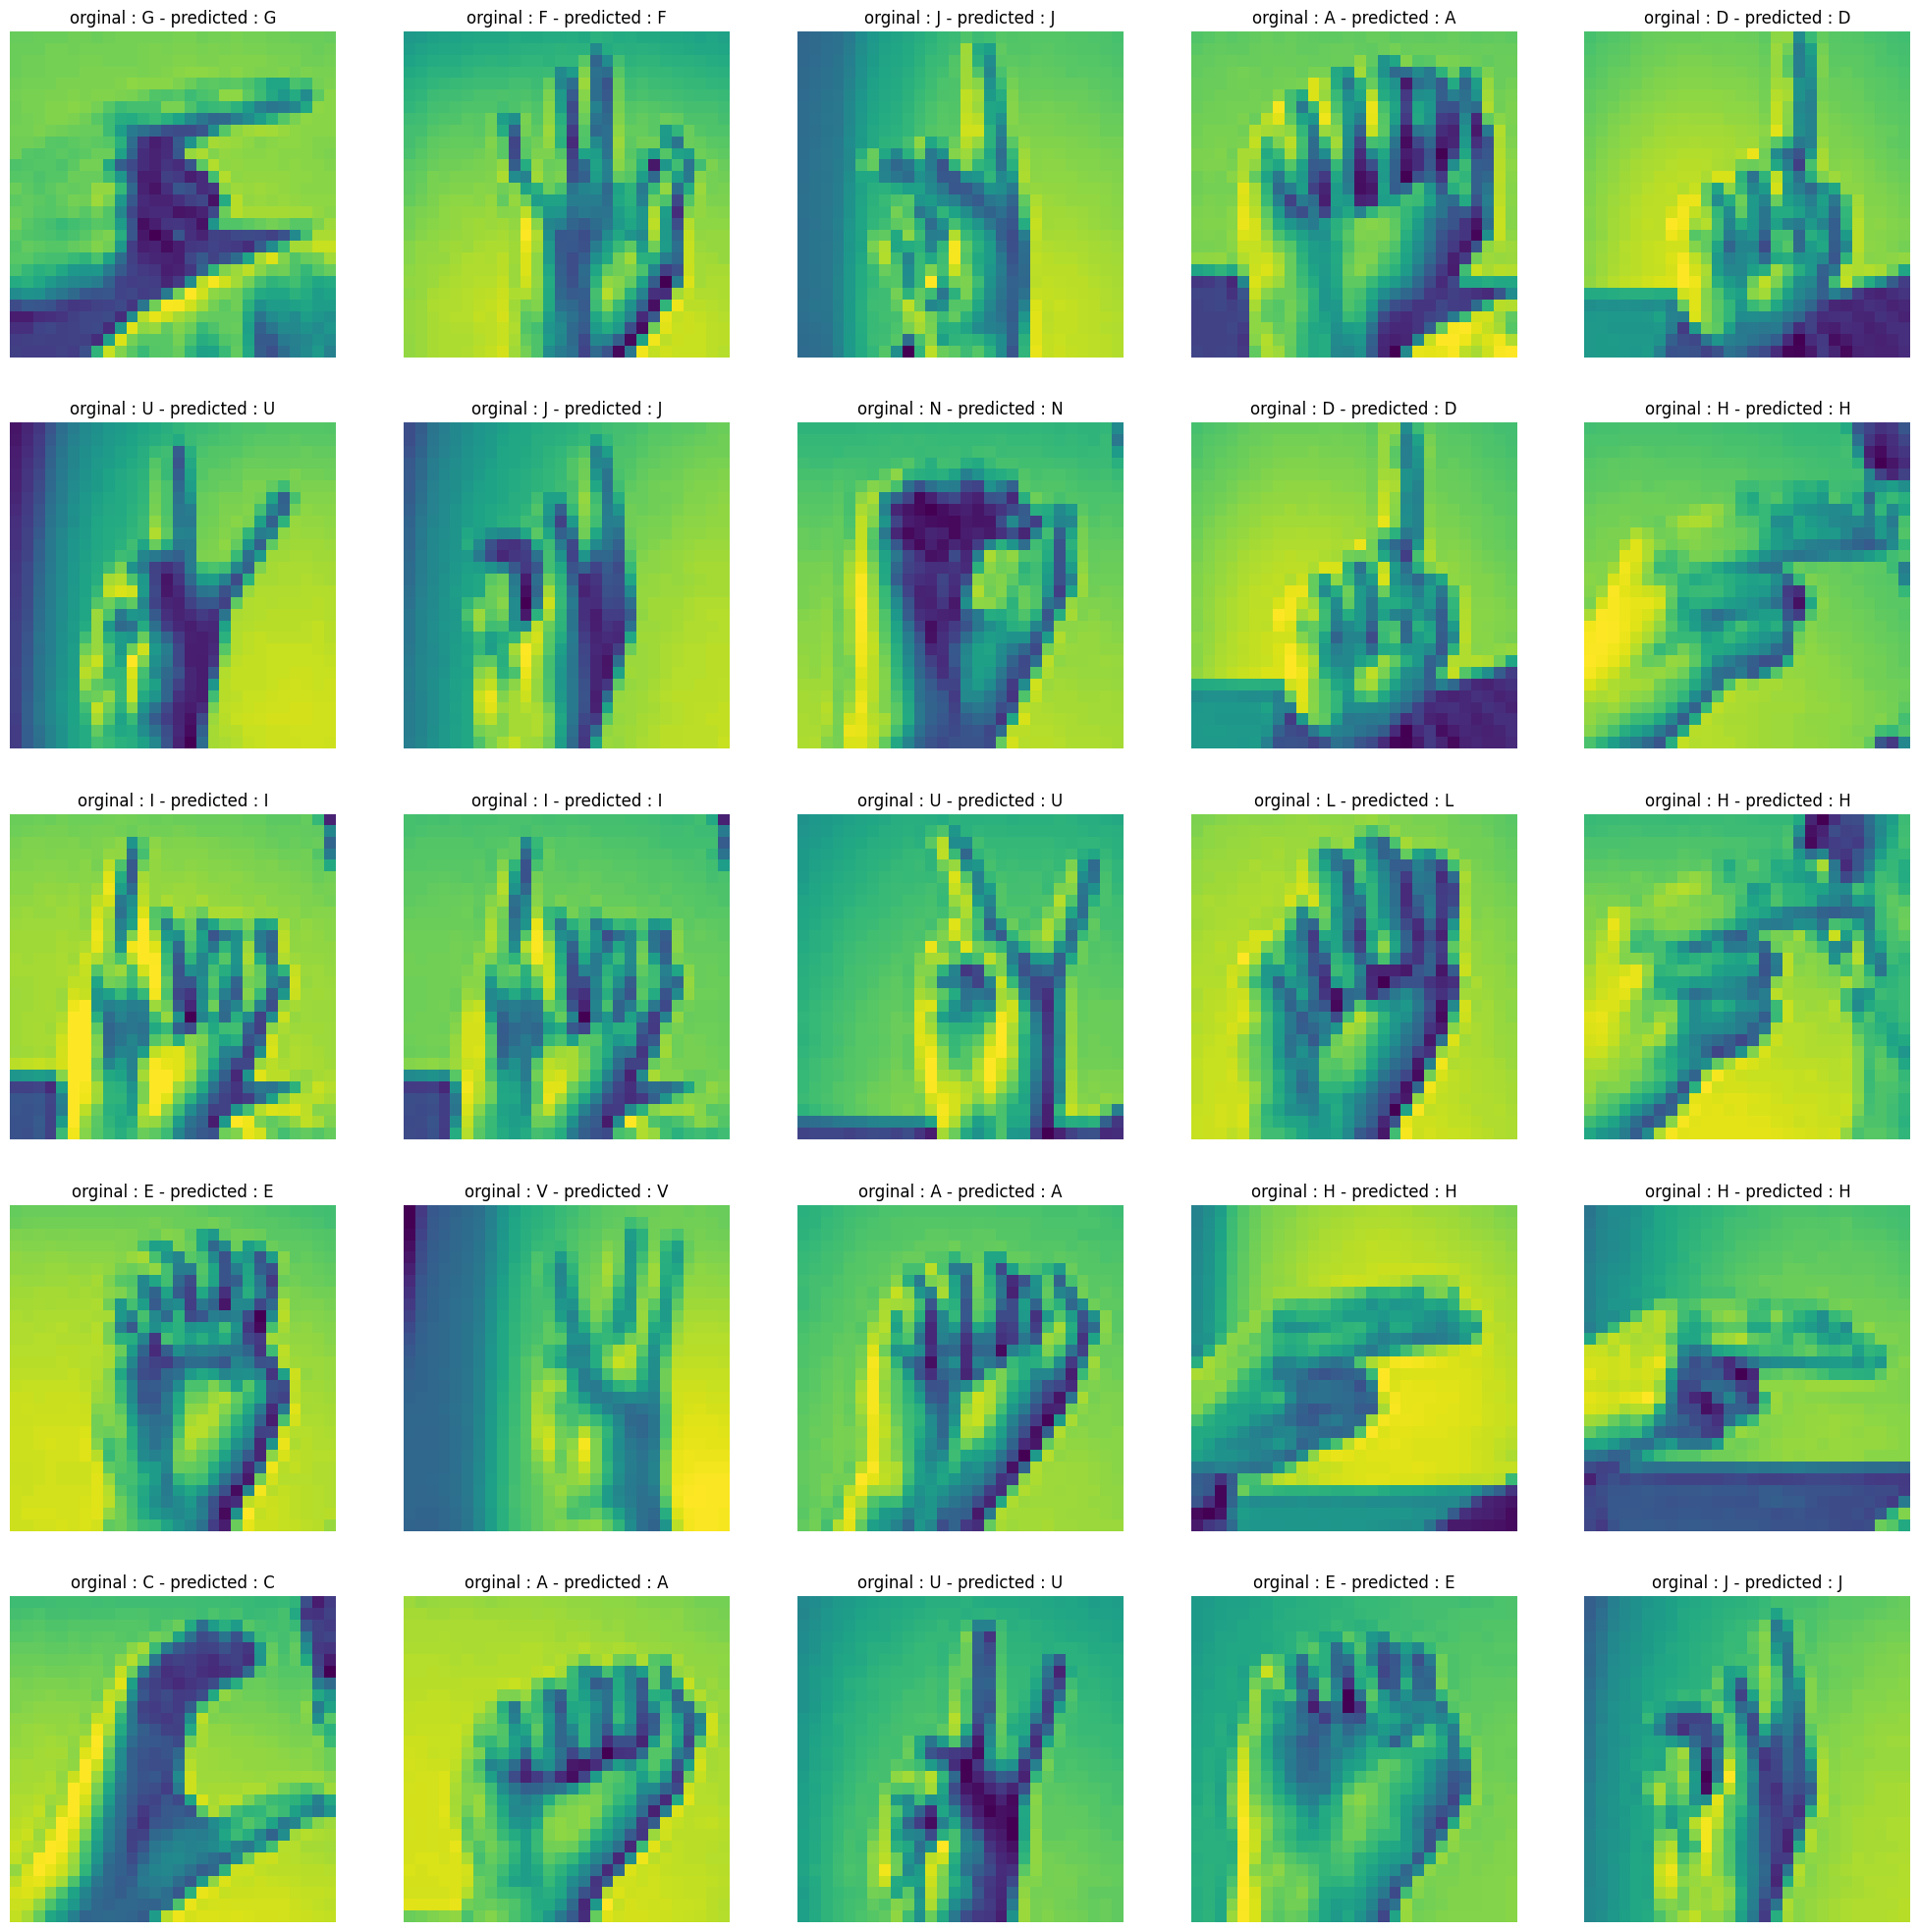

In [ ]:
#Visualizing some samples with test dataset with actual and predicted letter
plt.figure(figsize=(25,25))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[i])
    plt.title("orginal : {} - predicted : {}".format(chr(Y_true[i]+65), chr(Y_pred_classes[i]+65)))
    plt.axis("off")

In [ ]:
#Write: how higher epochs has better Accuracy

In [ ]:
#Get the predictions for the test data
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(Y_true, Y_pred_classes)

# Print the classification report
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       0.99      1.00      0.99       245
           4       1.00      0.95      0.97       498
           5       1.00      1.00      1.00       247
           6       1.00      0.95      0.98       348
           7       1.00      1.00      1.00       436
           8       0.99      1.00      0.99       288
           9       1.00      0.94      0.97       331
          10       1.00      1.00      1.00       209
          11       0.92      0.98      0.95       394
          12       0.97      1.00      0.98       291
          13       1.00      1.00      1.00       246
          14       1.00      1.00      1.00       347
          15       1.00      1.00      1.00       164
          16       0.88      0.99      0.93       144
   

In [ ]:
# Precision-recall curve

# from sklearn.metrics import precision_recall_curve
# from sklearn.preprocessing import label_binarize
# from itertools import cycle

# # Binarize the true labels
# Y_true_bin = label_binarize(Y_true, classes=[i for i in range(24)])

# # Compute precision-recall pairs for each class
# precision = dict()
# recall = dict()
# for i in range(24):
#     precision[i], recall[i], _ = precision_recall_curve(Y_true_bin[:, i], Y_pred[:, i])

# # Plot precision-recall curves
# plt.figure(figsize=(12, 8))
# colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue', 'purple'])
# for i, color in zip(range(24), colors):
#     plt.plot(recall[i], precision[i], color=color, lw=2, label='Class {0}'.format(i))

# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve for Each Class')
# plt.legend(loc="upper right")
# plt.show()


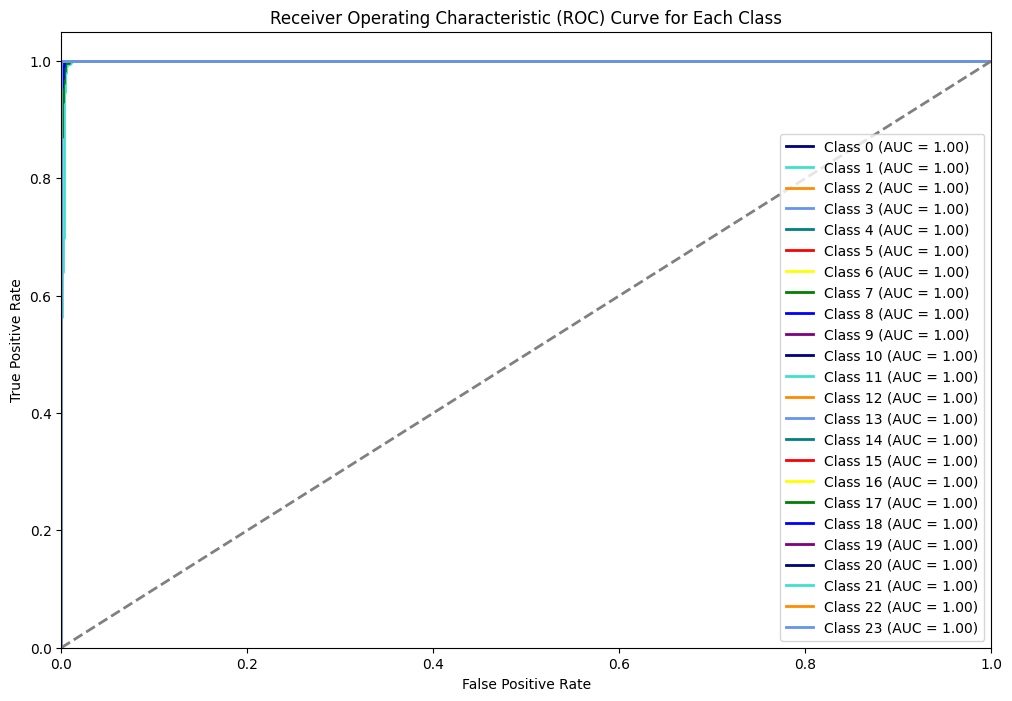

In [ ]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(24):
    fpr[i], tpr[i], _ = roc_curve(Y_true_bin[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(12, 8))
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue', 'purple'])
for i, color in zip(range(24), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#Evaluate and score the model -> for test dataset
score = model.evaluate(X_test,Y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))


Test Loss : 0.0607
Test Accuracy : 0.9824
